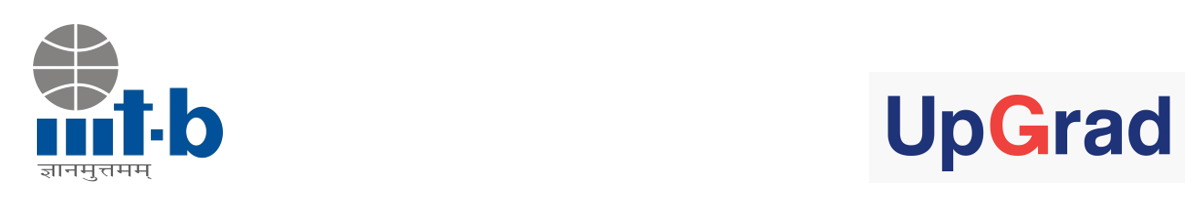

# 

 # ___`LENDING CLUB CASE STUDY`___

# Problem Statement
### Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

  

### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
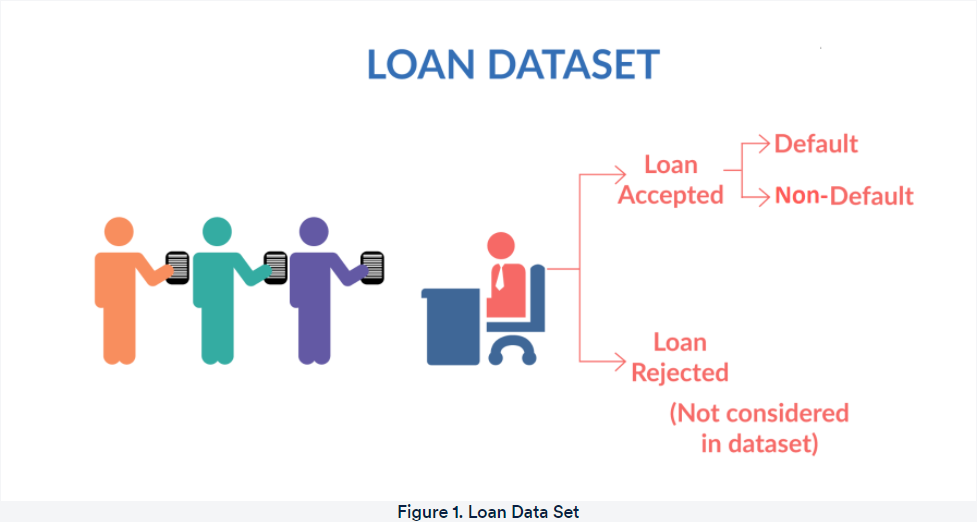

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    - __Fully paid__: Applicant has fully paid the loan (the principal and the interest rate)

    - __Current__: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    - __Charged-off__: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



#### Importing Libraries

In [1]:
import numpy as np # for mathematical operations
import pandas as pd # for reading and manipulation of data
import matplotlib.pyplot as plt # plotting charts and graphs
%matplotlib inline
import seaborn as sns # graph library that uses matplot in background
import plotly.express as px
import warnings # ignore the warnings
warnings.filterwarnings("ignore")
from datetime import datetime

#### Importing & Reading the Dataset

In [2]:
#importing the dataset
df_1 = pd.read_csv("loan.csv")

In [3]:
#reading the dataset
df_1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1068994,1303432,35000,22075,22050.0,60 months,17.27%,551.84,D,D3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1068159,1302729,35000,35000,35000.0,36 months,8.90%,1111.37,A,A5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1067084,1301459,35000,35000,35000.0,36 months,10.65%,1140.07,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1066155,1277661,35000,26825,26800.0,60 months,18.64%,690.56,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1065896,1300036,35000,35000,35000.0,36 months,8.90%,1111.37,A,A5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,312505,312443,500,500,450.0,36 months,9.76%,16.08,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
39713,242695,242682,500,500,500.0,36 months,10.71%,16.31,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39714,216698,174214,500,500,500.0,36 months,10.46%,16.25,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39715,211133,210644,500,500,475.0,36 months,11.41%,16.47,C,C3,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [4]:
df_1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# <font color =green> __Data Cleaning__

### In the dataset received, there are many quality issues that have been identified:<br><br>- There are many columns with missing values which need to be addressed efficiently, either by removing the missing rows/columns or by imputing data.<br><br>- There are various columns where we have constant values. As such, these columns are not not really vital to our analysis.<br><br>- Then, we identified some customer behaviour variables. These variables are not available to us during the time of loan application and are made available once the loan has been approved. Due to this, they play very little role in our current analysis of analysing whether the loan should be approved or not at the time of loan application.<br><br>- Next, we have certain columns where we will have to fix the datatype. The datatype will have to be changed for these columns in order to make our data more analysis-friendly.<br><br>- Then there are columns which cannot directly be helpful in our analysis; however, by creating derived metrics from these columns, we can achieve great insights from the analysis.<br><br>- Finally, we have the outliers which need to be removed from our data before proceeding to our analysis.

## <font color =blue> __Missing Values Treatment__

### Columns:<br><br>- The very first task is to remove the columns with 100% missing data.<br>- Then, we will drop the columns with most number of missing values<br>- Next, we will drop the columns which have constant values.<br><br>Rows:<br><br>- Check for rows with 100% missing values.<br>- Check for duplicate rows.<br>- Missing values row treatment.

### Fixing Columns

#### <font color =blue> Dropping all the columns with 100% missing values

In [5]:
df = df_1.dropna(axis=1, how='all')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [7]:
# Taking the column-wise sum of missing values to check for columns with highest number of missing values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### <font color =blue> Dropping the 04 columns with most percentage of missing values

#### The 04 columns are: 'next_pymnt_d' - 97% missing values, 'mths_since_last_record' - 93% missing values, 'mths_since_last_delinq' - 64% missing values and 'desc' - 32% missing values,<br><br>We have removed the 'desc' column as well, even though it has only 32% missing values. This is because, there is not much analysis can be done on this column as this column just tells us the description of the loan.

In [8]:
df = df.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1)

In [9]:
df_1.desc

0                                                      NaN
1          Borrower added on 12/13/11 > The purpose of ...
2                                                      NaN
3          Borrower added on 11/30/11 > Payoff credit c...
4          Borrower added on 12/13/11 > I have a stable...
                               ...                        
39712    I would like to pay off a chrge card from Kohl's.
39713                           help pay for flight travel
39714    I need a small injection of cash to take care ...
39715    Heart contentions, to leviate one credit card,...
39716    I currently live with my parents, study, and w...
Name: desc, Length: 39717, dtype: object

### Fixing Rows

In [10]:
# Checking for rows with 100% missing values
df.dropna(axis=0, how='all',inplace=True)

In [11]:
# Checking for rows with duplicate values
df.duplicated().sum()

0

In [12]:
# Taking the column-wise sum of missing values to check for columns with missing values
df.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

### As we see from the above columns infromation, we see that the missing values are very less as compared to the length of data that we have. Even if we remove the rows with these missing values, it wouldn't make much difference to our analysis of the data. Hence, we will remove these rows one by one, next.

#### <font color =blue> Removing the rows with missing values in "emp_title" column

In [13]:
df = df[df['emp_title'].notnull()]

#### <font color =blue> Removing the rows with missing values in "emp_length" column

In [14]:
df = df[df['emp_length'].notnull()]

#### <font color =blue> Removing the rows with missing values in "pub_rec_bankruptcies" column

In [15]:
df = df[df['pub_rec_bankruptcies'].notnull()]

In [16]:
# Taking the column-wise sum of missing values to check for columns with missing values
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          9
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

#### <font color =blue> Removing the rows with missing values in "last_pymnt_d" column

In [17]:
df = df[df['last_pymnt_d'].notnull()]

#### <font color =blue> Removing the rows with missing values in "revol_util" column

In [18]:
df = df[df['revol_util'].notnull()]

#### <font color =blue> Removing the rows with missing values in "title" column

In [19]:
df = df[df['title'].notnull()]

In [20]:
# Taking the column-wise sum of missing values to check for columns with missing values
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

#### Fixing the column 'collections_12_mths_ex_med'

In [21]:
# Checking the count of each value in 'collections_12_mths_ex_med' column
df['collections_12_mths_ex_med'].value_counts()

0.0    36431
Name: collections_12_mths_ex_med, dtype: int64

#### <font color =blue> Since the column "collections_12_mths_ex_med" has constant value "0.0", we can remove this column entirely

In [22]:
df.drop('collections_12_mths_ex_med', axis=1, inplace=True)

#### Fixing the column 'chargeoff_within_12_mths'

In [23]:
# Checking the count of each value in 'chargeoff_within_12_mths' column
df['chargeoff_within_12_mths'].value_counts()

0.0    36431
Name: chargeoff_within_12_mths, dtype: int64

#### <font color =blue> Since the column 'chargeoff_within_12_mths' has constant value "0.0", we can remove this column entirely

In [24]:
df.drop('chargeoff_within_12_mths', axis=1, inplace=True)

In [25]:
# Taking the column-wise sum of missing values to check for columns with missing values
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

#### All the missing values have now been dealt with.

## <font color =blue>Removing the Columns with Constant values 

In [26]:
# Checking the statistics distribution of the existing columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,36433.0,690982.567315,202643.477845,55742.00,522686.000000,670563.000000,8.399030e+05,1.077430e+06
member_id,36433.0,861070.701342,253882.185919,112493.00,675530.000000,856951.000000,1.049791e+06,1.314167e+06
loan_amnt,36433.0,11307.679851,7433.859357,500.00,5600.000000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,36433.0,11032.834244,7166.484281,500.00,5500.000000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,36433.0,10601.325781,7072.842604,0.00,5000.000000,9202.846434,1.450845e+04,3.500000e+04
installment,36433.0,326.186394,207.389943,16.08,168.900000,283.280000,4.322200e+02,1.305190e+03
annual_inc,36433.0,69305.224255,63542.442054,4000.00,42000.000000,60000.000000,8.300000e+04,6.000000e+06
dti,36433.0,13.444131,6.643308,0.00,8.360000,13.540000,1.869000e+01,2.999000e+01
delinq_2yrs,36433.0,0.146131,0.492199,0.00,0.000000,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,36433.0,0.864930,1.063430,0.00,0.000000,1.000000,1.000000e+00,8.000000e+00


#### So as per the above dataframe, we see that there are a number of columns with constant values. These columns do not have any productivity in terms of our analysis. Hence, it's better we drop these columns. These columns are:<br>- tax_liens<br>- delinq_amnt<br>- acc_now_delinq<br>- policy_code

#### There are some other columns with constant values but of 'object' datatype such as,<br>- application_type<br>- initial_list_status<br>- pymnt_plan<br><br>We can remove these columns completely as well.

#### Checking the column 'tax_liens'

In [27]:
# Checking the value counts in the column 'tax_liens'
df['tax_liens'].value_counts()

0.0    36433
Name: tax_liens, dtype: int64

#### <font color =blue> Since all the values in "tax_liens" column are "0.0", we can remove this column entirely

In [28]:
df.drop('tax_liens', axis=1, inplace=True)

#### Checking the column 'delinq_amnt'

In [29]:
# Checking the value counts in the column 'delinq_amnt'
df['delinq_amnt'].value_counts()

0    36433
Name: delinq_amnt, dtype: int64

#### <font color =blue> Since all the values in "delinq_amnt" column are "0", we can remove this column entirely

In [30]:
df.drop('delinq_amnt', axis=1, inplace=True)

#### Checking the column 'acc_now_delinq'

In [31]:
# Checking the value counts in the column 'acc_now_delinq'
df['acc_now_delinq'].value_counts()

0    36433
Name: acc_now_delinq, dtype: int64

#### <font color =blue> Since all the values in "acc_now_delinq" column are "0", we can remove this column entirely

In [32]:
df.drop('acc_now_delinq', axis=1, inplace=True)

#### Checking the column 'application_type'

In [33]:
df['application_type'].value_counts()

INDIVIDUAL    36433
Name: application_type, dtype: int64

#### <font color =blue> Since the column "application_type" has constant value "INDIVIDUAL", we can remove this column entirely

In [34]:
df.drop('application_type', axis=1, inplace=True)

#### Checking the column 'policy_code'

In [35]:
df['policy_code'].value_counts()

1    36433
Name: policy_code, dtype: int64

#### <font color =blue> Since the column "policy_code" has constant value "1", we can remove this column entirely

In [36]:
df.drop('policy_code', axis=1, inplace=True)

#### Checking the column 'initial_list_status'

In [37]:
df['initial_list_status'].value_counts()

f    36433
Name: initial_list_status, dtype: int64

#### <font color =blue> Since the column "initial_list_status" has constant value "f", we can remove this column entirely

In [38]:
df.drop('initial_list_status', axis=1, inplace=True)

#### Checking the column 'pymnt_plan'

In [39]:
df['pymnt_plan'].value_counts()

n    36433
Name: pymnt_plan, dtype: int64

#### <font color =blue> Since the column "pymnt_plan" has constant value "n", we can remove this column entirely

In [40]:
df.drop('pymnt_plan', axis=1, inplace=True)

#### Hence, we have now removed 07 columns completely from the dataset. The updated shape of the dataset is as below.

In [41]:
df.shape

(36433, 44)

In [42]:
# checking the statistical distribution of the remaining columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,36433.0,690982.567315,202643.477845,55742.00,522686.000000,670563.000000,8.399030e+05,1.077430e+06
member_id,36433.0,861070.701342,253882.185919,112493.00,675530.000000,856951.000000,1.049791e+06,1.314167e+06
loan_amnt,36433.0,11307.679851,7433.859357,500.00,5600.000000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,36433.0,11032.834244,7166.484281,500.00,5500.000000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,36433.0,10601.325781,7072.842604,0.00,5000.000000,9202.846434,1.450845e+04,3.500000e+04
installment,36433.0,326.186394,207.389943,16.08,168.900000,283.280000,4.322200e+02,1.305190e+03
annual_inc,36433.0,69305.224255,63542.442054,4000.00,42000.000000,60000.000000,8.300000e+04,6.000000e+06
dti,36433.0,13.444131,6.643308,0.00,8.360000,13.540000,1.869000e+01,2.999000e+01
delinq_2yrs,36433.0,0.146131,0.492199,0.00,0.000000,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,36433.0,0.864930,1.063430,0.00,0.000000,1.000000,1.000000e+00,8.000000e+00


## <font color =blue>Removing the Customer Behaviour Variables 

In [43]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### After performing the above operation, there is one more thing to note here. There are several variables in our data which are called "Customer Behaviour variables". These variables are not available to us during the time of loan application and are made available once the loan has been approved. Due to this, they play very little role in our current analysis of analysing whether the loan should be approved or not at the time of loan application. On going through the dataset and the data_dictionary, it becomes evident that out of the above columns, the below are "Customer Behaviour Variables",<br><br>- delinq_2yrs<br>- earliest_cr_line<br>- inq_last_6mths<br>- open_acc<br>- pub_rec<br>- revol_bal<br>- revol_util<br>- total_acc<br>- out_prncp<br>- out_prncp_inv<br>- total_pymnt<br>- total_pymnt_inv<br>- total_rec_prncp<br>- total_rec_int<br>- total_rec_late_fee<br>- recoveries<br>- collection_recovery_fee<br>- last_pymnt_d<br>- last_pymnt_amnt<br>- last_credit_pull_d<br><br>As such, we may drop these columns as well, since, we are not going to make any predictions based on these columns in our current analysis.

In [44]:
# Dropping all the above customer behaviour variables
df.drop(['delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',], axis=1, inplace=True)
df.shape

(36433, 24)

#### Lastly, we have few more columns which we are not going to use in the analysis,<br><br>- url: There is nothing but the id of the loan applicant that we can extract from this column. So, not of much use.<br>- zip_code: This column has first three digits of the area zip code which is also not of much use to our analysis<br><br>Hence, we will drop these columns as well.

In [45]:
# Dropping 'url' and 'zip_code' columns
df.drop(['url', 'zip_code'], axis=1, inplace=True)
df.shape

(36433, 22)

## <font color =blue>__Fixing Datatypes__

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 0 to 39712
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36433 non-null  int64  
 1   member_id             36433 non-null  int64  
 2   loan_amnt             36433 non-null  int64  
 3   funded_amnt           36433 non-null  int64  
 4   funded_amnt_inv       36433 non-null  float64
 5   term                  36433 non-null  object 
 6   int_rate              36433 non-null  object 
 7   installment           36433 non-null  float64
 8   grade                 36433 non-null  object 
 9   sub_grade             36433 non-null  object 
 10  emp_title             36433 non-null  object 
 11  emp_length            36433 non-null  object 
 12  home_ownership        36433 non-null  object 
 13  annual_inc            36433 non-null  float64
 14  verification_status   36433 non-null  object 
 15  issue_d            

#### As from the above information, we can see that there are a few columns where we need to correct the datatype in order to make the data cleaner for analysis. These columns are,<br><br>- term: From this column, we will drop the 'months' string and convert to integer datatype.<br>- int_rate: From this column, we drop the '%' sign and convert it into float datatype.<br>- emp_length: From this column, we will drop the string values and convert to integer datatype.<br>- issue_d: We need to change the datatype of this column from string object to datetime object. However, we will deal with this column under the section, 'Creating Derived Metrics'

#### <font color =blue> Changing the datatype of 'term' column from 'object' to 'int'. Here the values have additional space at index '0'. So we will have to deal with it accordingly.

In [47]:
df.term = df.term.apply(lambda x: int(x[1:3]))

#### <font color =blue> Removing the '%' sign from the values in 'int_rate' column and converting to float dtype

In [48]:
df.int_rate = df.int_rate.apply(lambda x: float(x[:-1]))

#### <font color =blue> Converting the 'emp_length' column from object datatype to int datatype

In [49]:
df.emp_length

0         3 years
1         6 years
2         2 years
3         8 years
4         5 years
           ...   
39698    < 1 year
39699     4 years
39700      1 year
39710      1 year
39712     7 years
Name: emp_length, Length: 36433, dtype: object

In [50]:
# assuming the emp_length <=1 to be '1' and >=10 to be '10'

def convert_years(x):
    if x[:3]=='10+':
        x=10
    elif x[0]=='<':
        x=1
    else:
        x=x[0]
    return int(x)

df.emp_length = df.emp_length.apply(convert_years)
df.emp_length

0        3
1        6
2        2
3        8
4        5
        ..
39698    1
39699    4
39700    1
39710    1
39712    7
Name: emp_length, Length: 36433, dtype: int64

## <font color =blue> __Creating Derived Metrics__

### Creating a derived metric for "issue_d" column with readable month and year
#### As mentioned in the earlier section, there is this particular column, 'issue_d' whose datatype is string object. We need to change the datatype of this column to datetime object in order to make it more readable and cleaner for our analysis.

In [51]:
# reading the 'issue_d' column
df.issue_d

0        11-Dec
1        11-Dec
2        11-Dec
3        11-Dec
4        11-Dec
          ...  
39698     8-May
39699     8-Apr
39700     8-Mar
39710     8-Mar
39712     8-Mar
Name: issue_d, Length: 36433, dtype: object

#### Converting one-digit year to two-digit year in order to convert to a proper readable format for conversion to datetime 64 format

In [52]:
# creating a function 'format_date' which changes the format of the existing date column.
# The existing column has mixed formats of date - in some cases it is y-mmm and in some cases it is yy-mmm.
# Hence, we will create a new column 'issue_date' with revised date yy-mmm
# then we change the datatype of the new column 'issue_date' to datetime object by using 'pd.to_datetime'

def format_date(x):
    if x[1] == '-':
        x = '0'+ x
        return x
    else:
        return x
df.issue_date = df.issue_d.apply(format_date)
df.issue_date = pd.to_datetime(df.issue_date, format = "%y-%b", yearfirst=True)
df.issue_date

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39698   2008-05-01
39699   2008-04-01
39700   2008-03-01
39710   2008-03-01
39712   2008-03-01
Name: issue_d, Length: 36433, dtype: datetime64[ns]

In [53]:
# creating 02 new columns with loan issue month and loan issue year
df['issue_month'] = df.issue_date.dt.month
df['issue_year'] = df.issue_date.dt.year

# create a new column 'issue_month_year' with only
df['issue_month_year'] = pd.to_datetime(df.issue_date).dt.to_period('M')

#### We have now created 03 new columns - 'issue_month', 'issue_year', 'issue_month_year' for ease in readability for our analysis

## <font color =blue> __Removing Outliers__

#### Checking for outliers in 'annual_inc' column

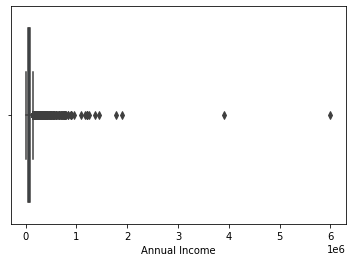

In [54]:
# plotting a boxplot using seaborn for analyzing possibility of any outliers in the 'annual_inc' column
sns.boxplot(df.annual_inc)
plt.xlabel("Annual Income")
plt.show()

In [55]:
df.annual_inc.describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### From the above boxplot & statistics, we do see that there are some outliers in the 'annual_inc' column. The value at 75th percentile is 80000, while the maximum value is 6000000. Let's dig in more to check.

In [56]:
# checking for 90th percentile
df.annual_inc.quantile(0.9)

115000.0

In [57]:
# checking for 99th percentile
df.annual_inc.quantile(0.99)

230000.0

In [58]:
# max value is 6000000

#### Here, there is a huge jump from 99th percentile to 100th percentile

In [59]:
# removing the outliers after 99% percentile as after that there is a huge jump from 230,000 to 6,000,000
df = df[(df.annual_inc) <= (df.annual_inc.quantile(0.99))]
df.shape

(36075, 25)

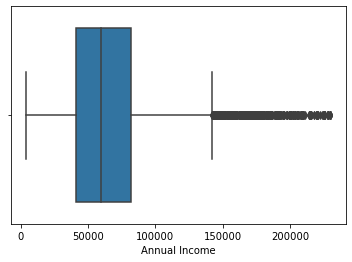

In [60]:
sns.boxplot(df.annual_inc)
plt.xlabel("Annual Income")
plt.show()

### Now we have removed the outliers from the 'annual_inc' column and the plot now looks more continuous.

### Further, let's look if there are any outliers in other numeric variables

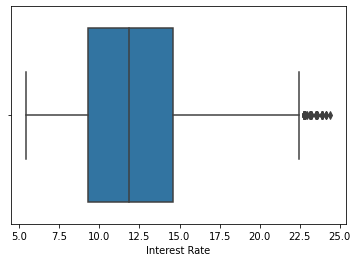

In [61]:
# Checking for outliers in 'int_rate' column
sns.boxplot(df.int_rate)
plt.xlabel("Interest Rate")
plt.show()

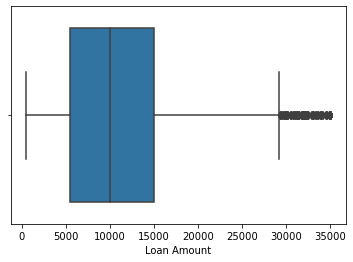

In [62]:
# Checking for outliers in 'loan_amnt' column
sns.boxplot(df.loan_amnt)
plt.xlabel("Loan Amount")
plt.show()

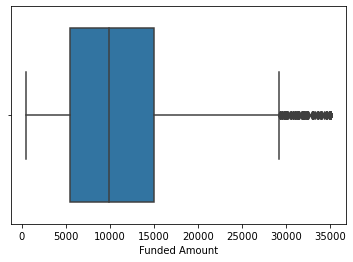

In [63]:
# Checking for outliers in 'funded_amnt' column
sns.boxplot(df.funded_amnt)
plt.xlabel("Funded Amount")
plt.show()

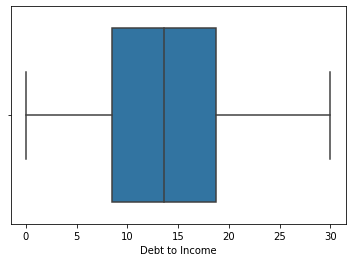

In [64]:
# Checking for outliers in 'dti' column
sns.boxplot(df.dti)
plt.xlabel("Debt to Income")
plt.show()

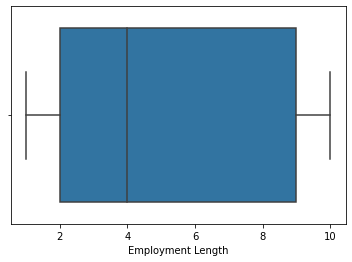

In [65]:
# Checking for outliers in 'emp_length' column
sns.boxplot(df.emp_length)
plt.xlabel("Employment Length")
plt.show()

### The above plots look pretty much continuous, hence, we do not need to do any outlier removal here.

# <font color =green> __Data Analysis__

### After having addressed the data quality issues, we now move on to the analysis part. Our analysis is divided into 03 parts namely:<br><br>- _Univariate Analysis_: Under univariate analysis, we are going to analyse a single individual columns and going to derive some really important insights which will help further in our analysis. We will be checking various categorical and numerical variables with the help of suitable plots like histograms, boxplots etc.<br><br>- _Segmented Univariate Analysis_: Here, we are going to segment our variables into the cases where the loan has been fully paid and the cases where the the loan has been defaulted. The analysis will be aided by plotting appropriate plots.<br><br>- _Bivariate Analysis_: Lastly, we will check the correlation between various variables in order to arrive at the most important combinations along with making business and analytical sense.

## <font color =blue> Univariate Analysis

### Categorical Variables:<br>- 'loan_status' column<br>-  Derived 'issue_month_year' column<br>-  'Grade' column<br>-  'emp_length' column

### Numerical Variables:<br>- 'int_rate' column<br>-  'loan_amnt' column<br>-  'dti' column

### 1) Analysing the "loan_status" column

In [66]:
# checking for the counts of each category
df.loan_status.value_counts()

Fully Paid     30113
Charged Off     4909
Current         1053
Name: loan_status, dtype: int64

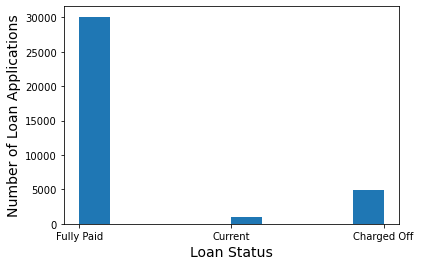

In [67]:
# plotting a histogram for 'loan_status' column
plt.hist(df.loan_status)
plt.xlabel("Loan Status",fontsize=14)
plt.ylabel("Number of Loan Applications",fontsize=14)
plt.show()

#### The ones marked as 'Current' are neither fully paid nor defaulted. As such, they won't be able to help much in the current analysis. Hence, we will remove these.

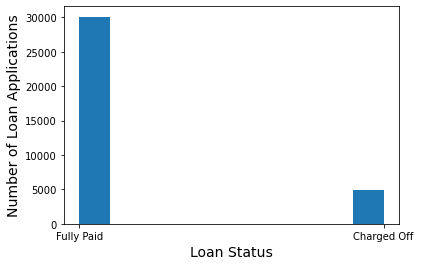

In [68]:
# removing the rows where the loan status is 'Current'
df = df[-(df.loan_status == 'Current')]
plt.hist(df.loan_status)
plt.xlabel("Loan Status",fontsize=14)
plt.ylabel("Number of Loan Applications",fontsize=14)
plt.show()

In [69]:
# Taking the percentage of 'Charged Off' loans
charged_off_percent = round(len(df[df.loan_status == 'Charged Off'])/len(df.loan_status)*100)
fully_paid_percent = round(100 - charged_off_percent)

print(f"The percentage of charged off loans is: {charged_off_percent}")
print(f"The percentage of fully paids loans is: {fully_paid_percent}")

The percentage of charged off loans is: 14
The percentage of fully paids loans is: 86


### We can conclude here that the most of the loan applicants have fully paid their dues.<br>The charged off loans are only 14% while most of the loans are fully paid

### 2) Analysing the derived "issue_month_year" column

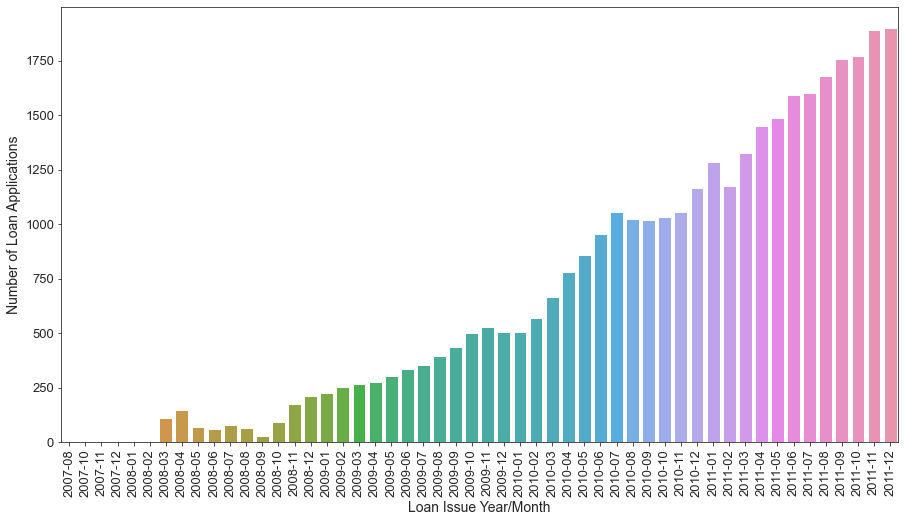

In [70]:
# plotting a countplot using seaborn for 'issue_month_year' column using seaborn
plt.figure(figsize=[15,8])
sns.set_style(style='ticks')
sns.countplot(x = df['issue_month_year'].sort_values(), data = df)
plt.xlabel("Loan Issue Year/Month",fontsize=14)
plt.ylabel("Number of Loan Applications",fontsize=14)
plt.yticks(size=13)
plt.xticks(size=13)
plt.xticks(rotation=90)
plt.show()

### The loan applications keep increasing each month starting year 2007. Though, there is a dip in the loan applications from the end of second quarter of 2008 , all the way to third quarter. However,it gradually increases in the fourth quarter.<br>

### 3) Analysing the "Grade" column

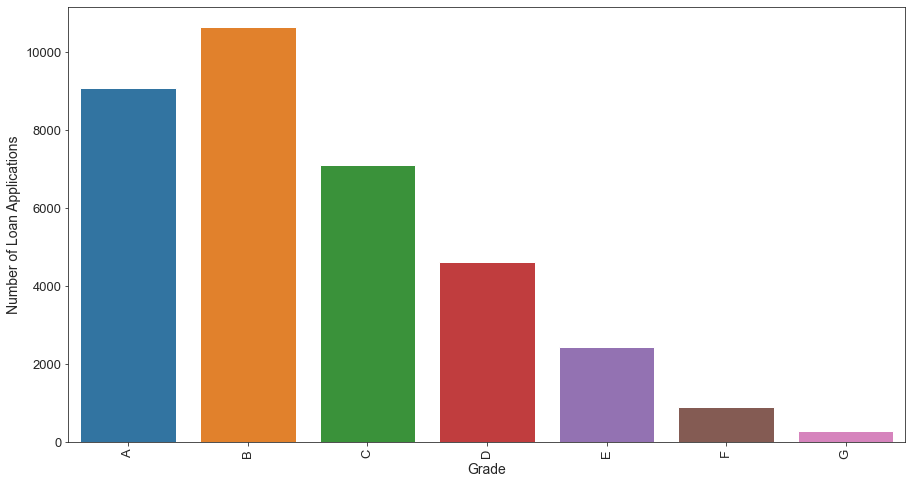

In [71]:
# plotting a countplot for 'grade' column using seaborn
plt.figure(figsize=[15,8])
sns.set_style(style='ticks')
sns.countplot(x = df['grade'].sort_values(), data = df)
plt.xlabel("Grade",fontsize=14)
plt.ylabel("Number of Loan Applications",fontsize=14)
plt.yticks(size=13)
plt.xticks(size=13)
plt.xticks(rotation=90)
plt.show()

### From the above plot, we can infer that most of the loans are graded as 'B'. The number of loan applications decrease as we move from grade 'A' to grade 'G'.

### 4) Analysing the "int_rate" column

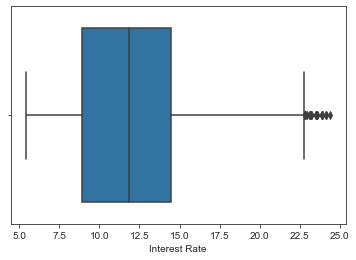

In [72]:
# plotting a boxplot for 'int_rate' using seaborn
sns.boxplot(df.int_rate)
plt.xlabel("Interest Rate")
plt.show()

### As we see from the above boxplot, most of the loans have interest rates between 8 and 15.

### 5) Analysing the "emp_length" column

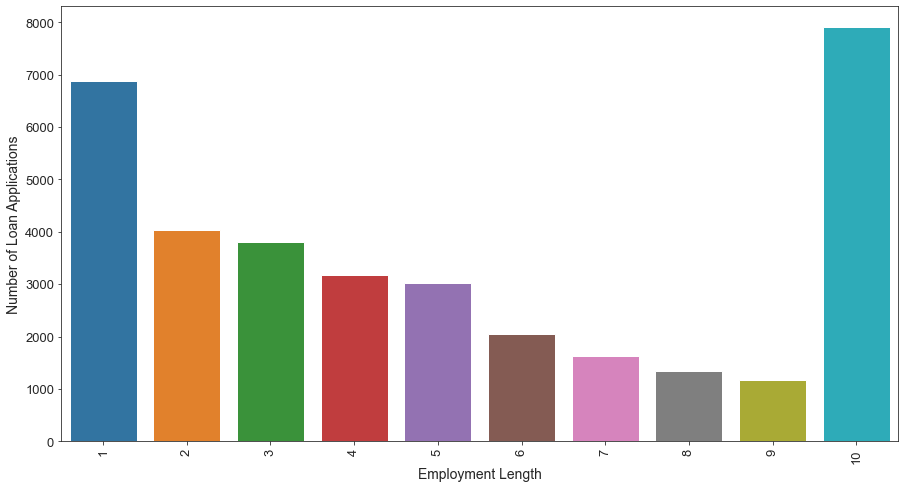

In [73]:
# plotting a boxplot for 'emp_length' using seaborn
plt.figure(figsize=[15,8])
sns.set_style(style='ticks')
sns.countplot(x = df['emp_length'].sort_values(), data = df)
plt.xlabel("Employment Length",fontsize=14)
plt.ylabel("Number of Loan Applications",fontsize=14)
plt.yticks(size=13)
plt.xticks(size=13)
plt.xticks(rotation=90)
plt.show()

### Most of the loan applicants have experience of 10 years or more. Also, the employees with an experience of 1 year or less are the second highest loan applicants.

### 6) Analysing the "loan_amnt" column

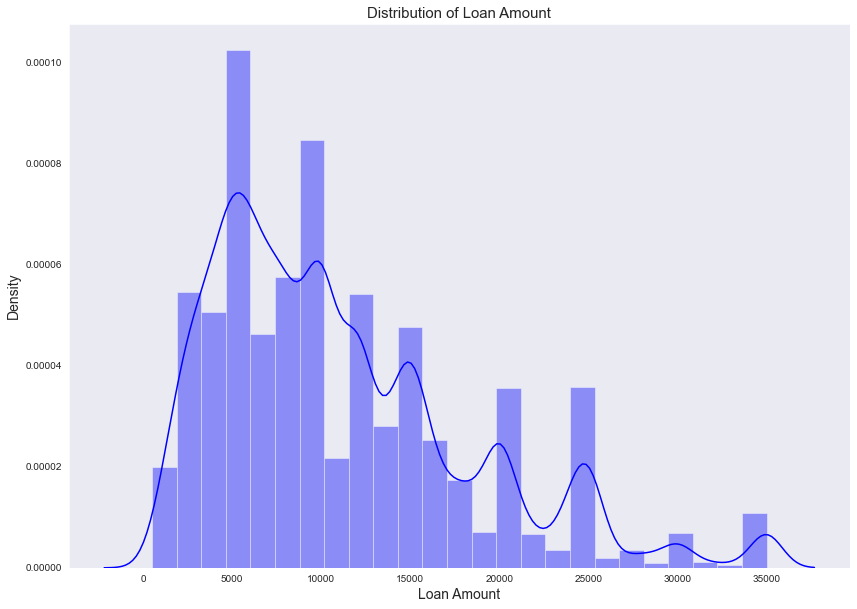

In [74]:
# plotting a distribution plot for 'loan_amnt' using seaborn
plt.figure(figsize=[14,10])
sns.set_style("dark")
sns.distplot(df.loan_amnt, bins=25, color='b')
plt.title("Distribution of Loan Amount", fontsize=15)
plt.xlabel("Loan Amount",fontsize=14)
plt.ylabel("Density",fontsize=14)
plt.show()

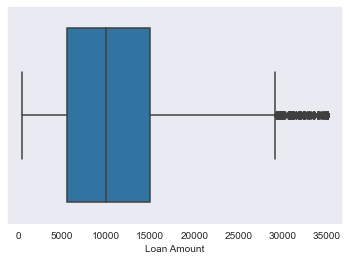

In [75]:
# plotting a boxplot for 'loan_amnt' using seaborn
sns.boxplot(df.loan_amnt)
plt.xlabel("Loan Amount")
plt.show()

### The maximum loan applications are for the amount between 5000 and 15000.

### 7) Analysing the "dti" column

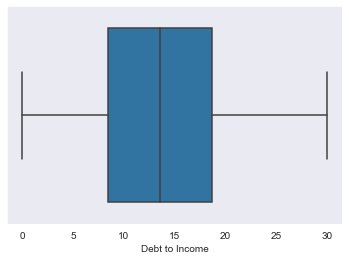

In [76]:
# plotting a boxplot for 'dti' using seaborn
sns.boxplot(df.dti)
plt.xlabel("Debt to Income")
plt.show()

In [77]:
df.dti.describe()

count    35022.000000
mean        13.461859
std          6.621795
min          0.000000
25%          8.390000
50%         13.570000
75%         18.690000
max         29.990000
Name: dti, dtype: float64

### As we see from the above boxplot, most of the loans have dti between 8 and 19.

## <font color =blue> Segmented Univariate Analysis

In [78]:
# Creating a custom function "create_countplot" since we will keep needing to create plots under segmented univariate analysis.
# So in order to avoid repetitive code writing, we will create this function here.

def create_countplot(a, a_label, pal_style, xlabel_rot):
    
    # The above function takes in 04 arguments:
    # a = the column to be analysed (string)
    # a_label = the label name on the x-axis (string)
    # pal_style = palette style to be used (string)
    # xlabel_rot = rotation of the x-axis label ticks (int - either 0 or 90)
    
    
    # The code below is for creating the countplot using seaborn library. We will set the "hue" to "loan_status"
    
    plt.figure(figsize=[15,8])
    sns.set_style(style='ticks')
    ax=sns.countplot(x = a, hue = 'loan_status', data = df, palette = pal_style)
    plt.xlabel(a_label,fontsize=14)
    plt.ylabel("Number of Loan Applicants",fontsize=14)
    plt.yticks(size=13)
    plt.xticks(size=13)
    plt.xticks(rotation=xlabel_rot)
    plt.legend(loc='upper right', bbox_to_anchor=(1,1), title='Loan Status', title_fontsize=15, fontsize=13)
  
    # The below code is written to show the percentage of the counts for the particular bar.
    # We intend to take the percentage of fully paid and charged off cases.

    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]
    
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        
        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

### 1) Performing the analysis on 'purpose' column

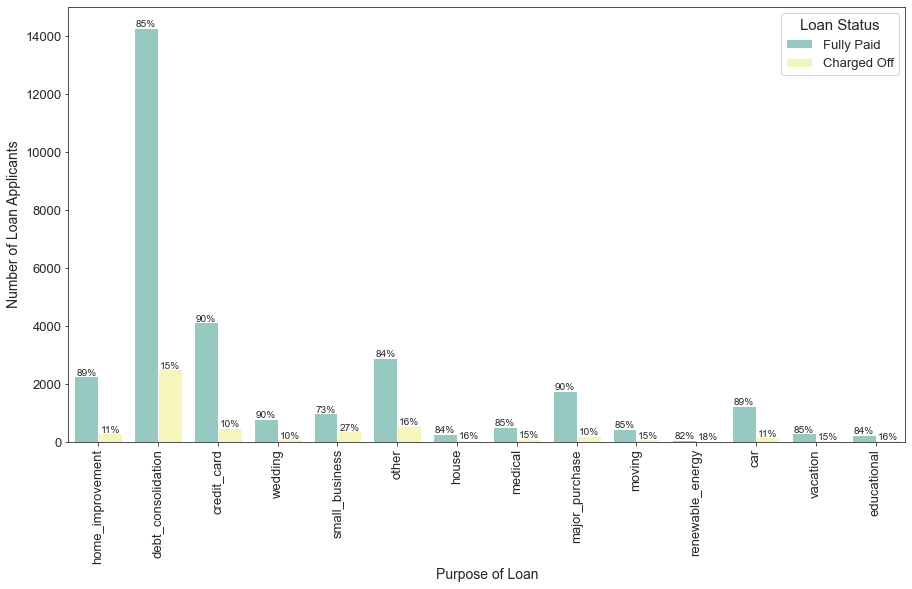

In [79]:
# plotting countplot using custom function create_countplot()
create_countplot("purpose", "Purpose of Loan", "Set3", 90)

### The 'purpose' column gives us a great deal of insight on whether a loan will get defaulted or not. Here as we see, the most no of loan applications are for 'debt consolidation' purpose. However, the default cases are only 15%. If we move towards right, we see that the loan_applications for small business have most percentage of default cases,i.e. 27%. We may conclude here that if the purpose for loan is 'business', then it is more likely to be a default case than any other purpose. One more purpose worth noting here is 'renewable_energy' which is 18%.

### 2) Performing the analysis on 'verification_status' column

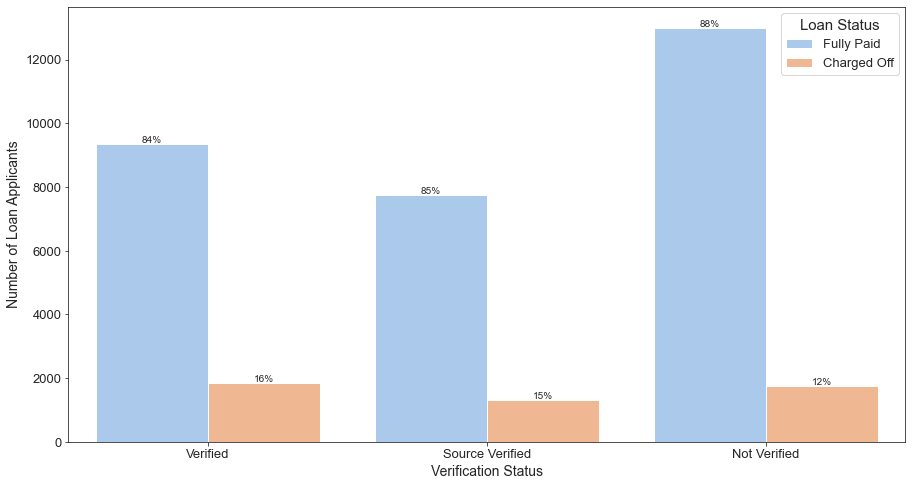

In [80]:
# plotting countplot using custom function create_countplot()
create_countplot("verification_status", "Verification Status", "pastel", 0)

### The loans which are verified by LC but the income source is not verified have 16% chances that it will be a default case. The loans with source verified have 15% default ratio. However, it is very surprising to note here that the loan cases which are not at all verified have only 12% default ratio.

### 3) Performing the analysis on 'Grade' column

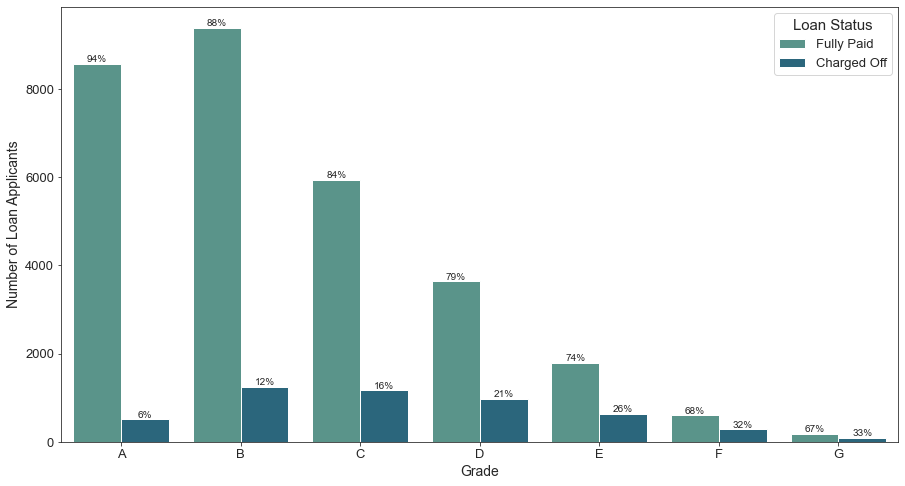

In [81]:
# plotting countplot using custom function create_countplot()
create_countplot(df.grade.sort_values(), "Grade", "crest", 0)

### Grade is a very good indicator of default cases. As we move towards right from A to G, the number of total loan applications decrease. However, with this, the percentage of charged off cases increase. The grade 'A' has the least default ratio whereas the grade 'G has the highest default ratio of 33%. Thus, we can further conclude that if the loan application is allotted a grade 'G' it is more likely to be a default case than any other grade.

### 4) Performing the analysis on 'home_ownership' column

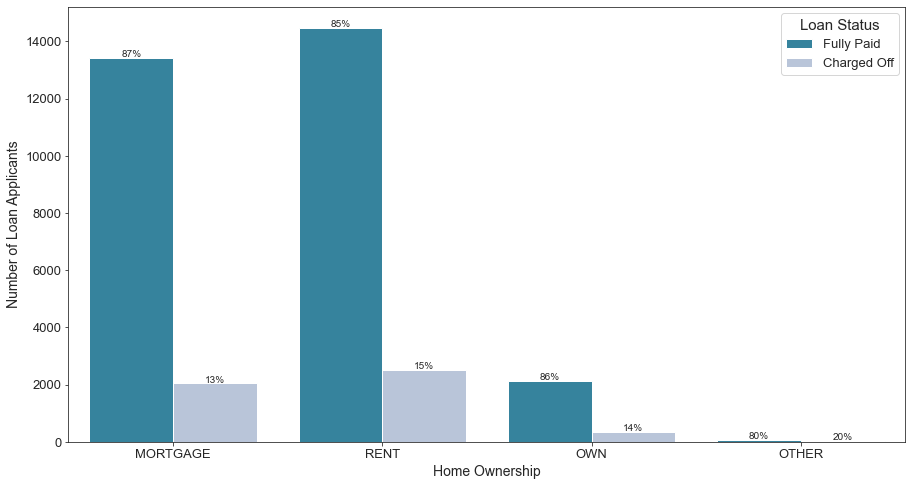

In [82]:
# plotting countplot using custom function create_countplot()
create_countplot("home_ownership", "Home Ownership", "PuBuGn_r", 0)

### With this plot, we see that "Other" has the highest percentage of default cases followed by the "Rent" category. The loan applicants with category "Mortgage" have the highest loan repayment ratio. This may be because the properties of the applicants are at stake due to which they tend to repay the loan.

### 5) Performing the analysis on 'addr_state' column

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


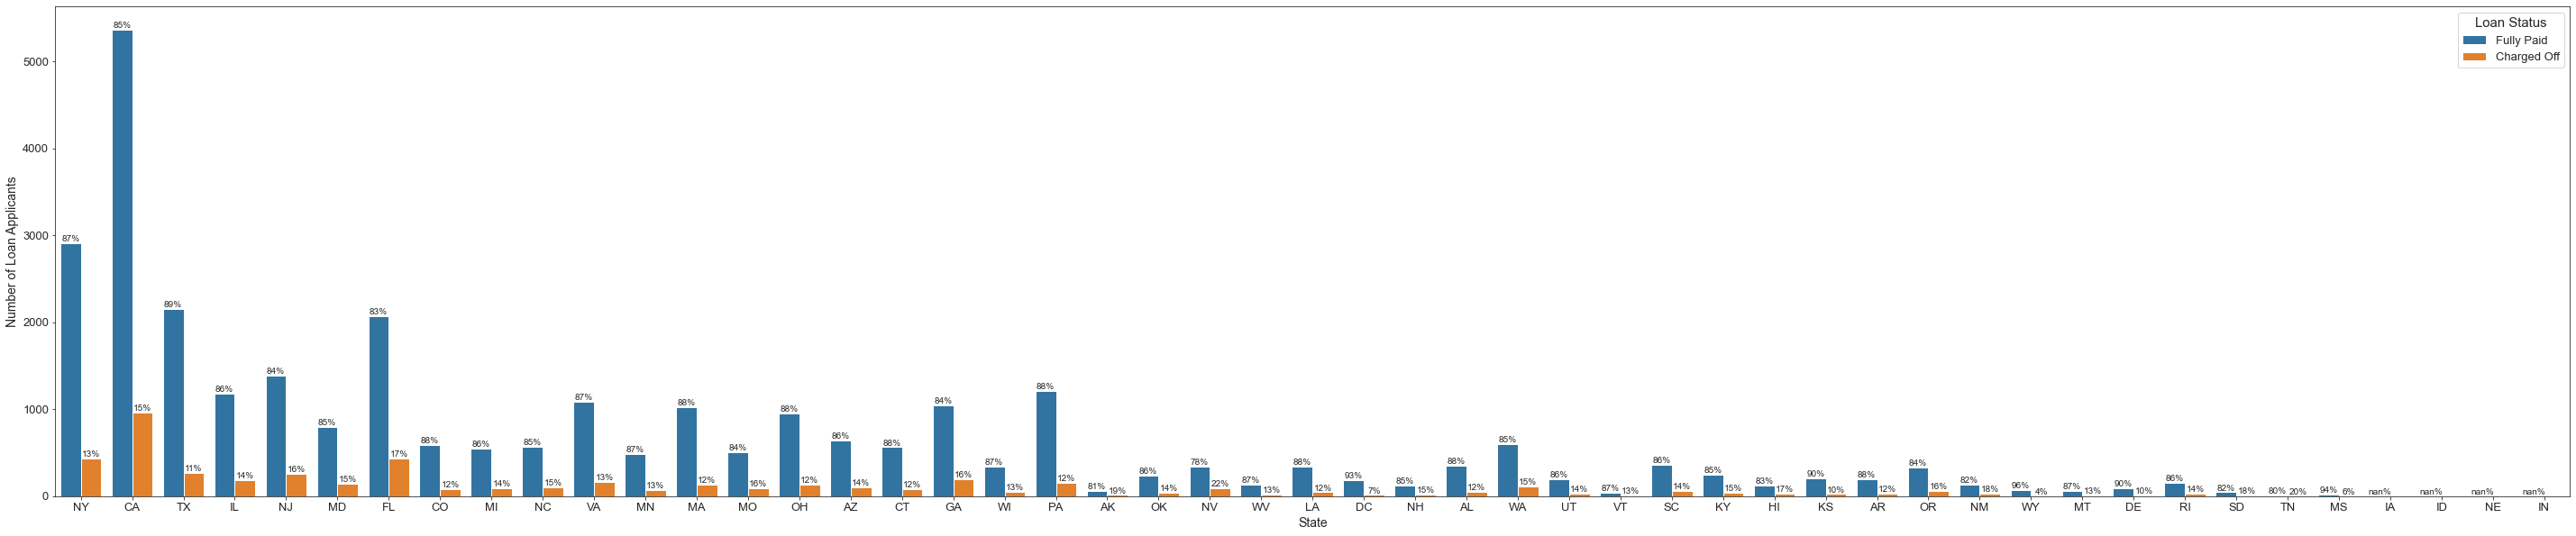

In [83]:
# plotting a countplot for 'addr_state' using seaborn
plt.figure(figsize=[50,10])
sns.set_style(style='ticks')
ax=sns.countplot(x = 'addr_state', hue = 'loan_status', data = df)
plt.xlabel("State",fontsize=14)
plt.ylabel("Number of Loan Applicants",fontsize=14)
plt.yticks(size=13)
plt.xticks(size=13)
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(1,1), title='Loan Status', title_fontsize=15, fontsize=13)

# The below code is written to show the percentage of the counts for the particular bar.
# We intend to take the percentage of fully paid and charged off cases.

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 20, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 20, '{0:.0%}'.format(height_r/total), ha="center")

### The highest number of loan applications are received from CA, NY, TX, and FL. However, when we check the default ratio for these, we see that for CA, it is 15%, NY is only 13%, TX is just 11%, while FL is the highest of the four, being 17%.<br>The highest percentage of default cases out of all the states are seen in NV which is 22%. Also, we can see TN which has second highest percentage of default cases, 20% followed by AK, 19% and SD & NM each having 18%<br> Also, we can see that the states 'IA', 'ID', 'NE' and 'IN' have 0% of loan default cases.

### 6) Performing the analysis on 'term' column

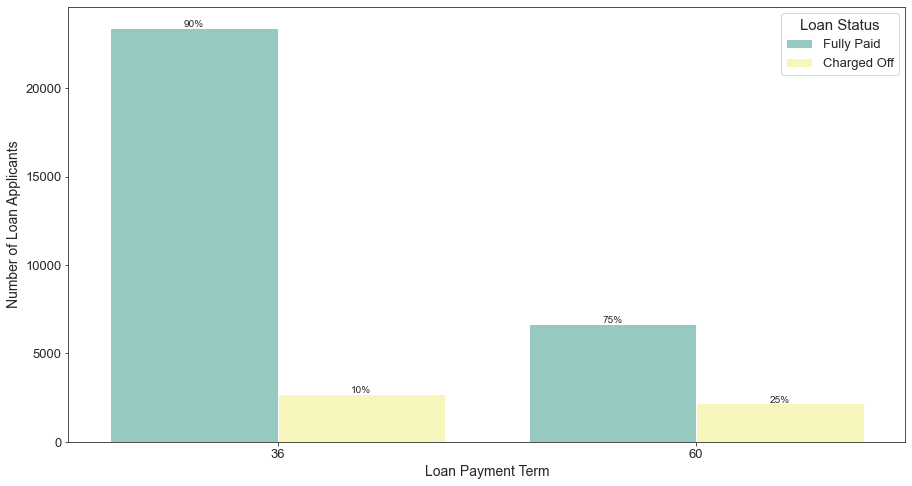

In [84]:
# plotting countplot using custom function create_countplot()
create_countplot("term", "Loan Payment Term", "Set3", 0)

### From the above plot, we can deduce that the loan applications with 60 month term have higher percentage of loan default cases - 25%. This can be strong indicator which can help us tell if the loan may default or not.

### 7) Performing the analysis on 'dti' column

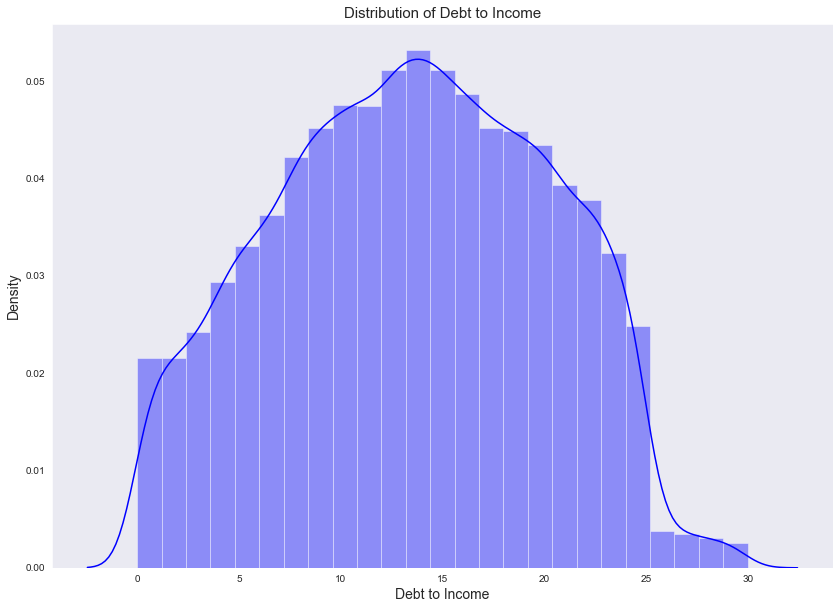

In [85]:
# plotting a distplot to see the distribution of the dti across all the loan applications
plt.figure(figsize=[14,10])
sns.set_style("dark")
sns.distplot(df.dti, bins=25, color='b')
plt.title("Distribution of Debt to Income", fontsize=15)
plt.xlabel("Debt to Income",fontsize=14)
plt.ylabel("Density",fontsize=14)
plt.show()

#### From the above distribution plot, it is quite evident that the maximum number of loan applications have dti between 10 and 20. Let's convert this variable into categorical variable and try to get further insights.

In [86]:
# Creating a function 'dti_range_calc' for categorizing the column into - 'low', 'medium' and 'high' 
def dti_range_calc(dti):
    if dti <= 8.00:
        return 'low'
    elif (dti >8.00 and dti <= 19.00):
        return 'medium'
    else:
        return 'high'

# Using apply() method in dti column and creating a new column, 'dti_range'
df['dti_range'] = df.dti.apply(dti_range_calc)
df.dti_range

0           low
1          high
2           low
3        medium
4        medium
          ...  
39698    medium
39699    medium
39700       low
39710       low
39712      high
Name: dti_range, Length: 35022, dtype: object

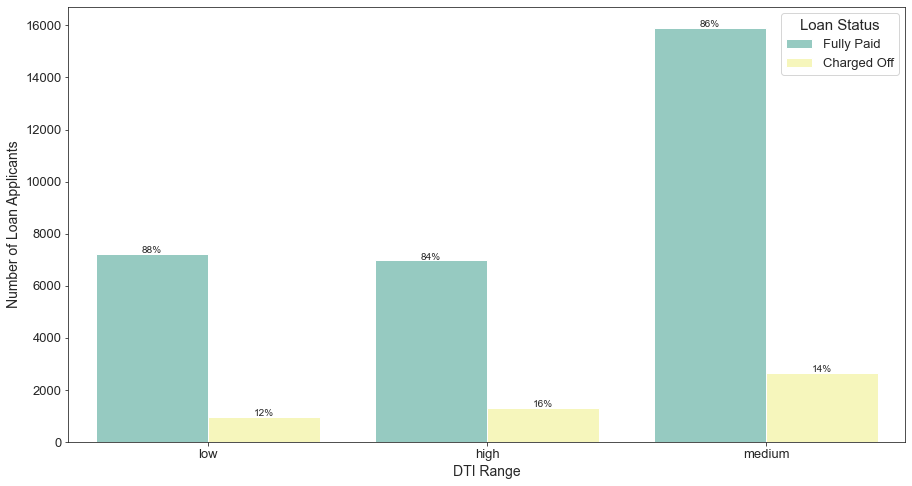

In [87]:
# plotting countplot using custom function create_countplot()
create_countplot("dti_range", "DTI Range", "Set3", 0)

### As seen from the distribution plot earlier, the maximum loan applications have dti between 8 and 19 i.e. medium range. However, the highest percentage of loan default cases is within high range, meaning, the loan applications where the dti is greater than 19, there are higher chances of the loan getting defaulted.

### 8) Performing the analysis on 'int_rate' column

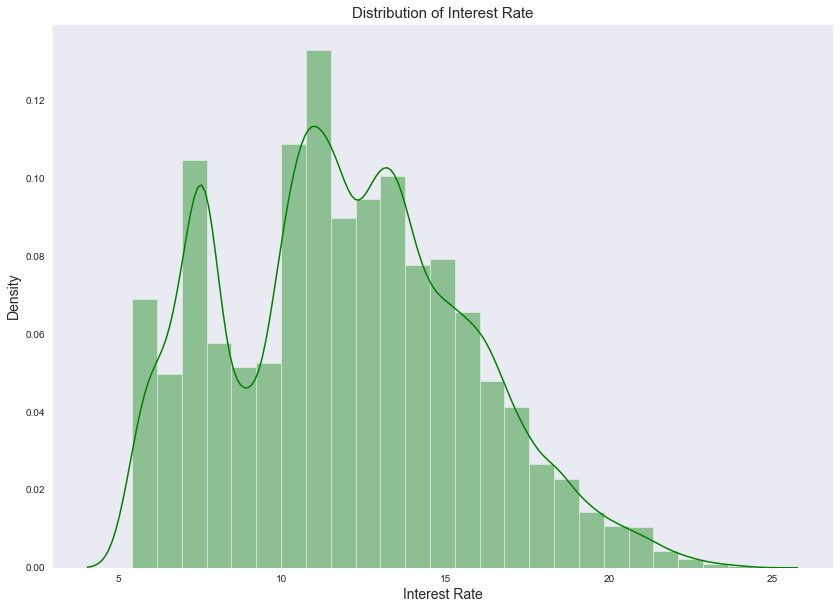

In [88]:
# plotting a distplot to see the distribution of the dti across all the loan applications
plt.figure(figsize=[14,10])
sns.set_style("dark")
sns.distplot(df.int_rate, bins=25, color='g')
plt.title("Distribution of Interest Rate", fontsize=15)
plt.xlabel("Interest Rate",fontsize=14)
plt.ylabel("Density",fontsize=14)
plt.show()

#### From the above distribution plot, it is quite evident that the maximum number of loan applications have interest rate between 8 and 15. Let's convert this variable into categorical variable and try to get further insights.

In [89]:
# Creating a function 'int_rate_range_calc' for categorizing the column into - 'low', 'medium' and 'high' 
def int_rate_range_calc(int_rate):
    if int_rate <= 8.00:
        return 'low'
    elif (int_rate >8.00 and int_rate <= 15.00):
        return 'medium'
    else:
        return 'high'

# Using apply() method in dti column and creating a new column, 'dti_range'
df['int_rate_range'] = df.int_rate.apply(int_rate_range_calc)
df.int_rate_range

0          high
1        medium
2        medium
3          high
4        medium
          ...  
39698    medium
39699       low
39700       low
39710       low
39712    medium
Name: int_rate_range, Length: 35022, dtype: object

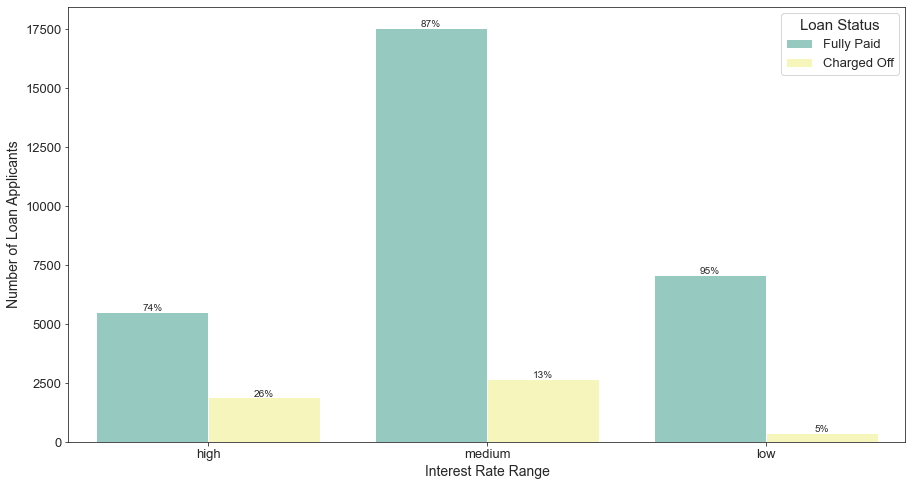

In [90]:
# plotting countplot using custom function create_countplot()
create_countplot("int_rate_range", "Interest Rate Range", "Set3", 0)

### As seen earlier from the distribution plot, the maximum loan applications have interest rates between 8 and 15 i.e. medium range. However, the loan applications with interest rate under 'medium' range have only 13% of loan default cases. If we take close look at other two categories, we see that 'low' category of interest rates has the least ratio of loan default cases. The 'high' category has the highest percentage of loan default cases, i.e. 26%.<br><br>This is a really strong indicator that tells us whether the loan will be defaulted or not.

### 9) Performing the analysis on 'emp_length' column

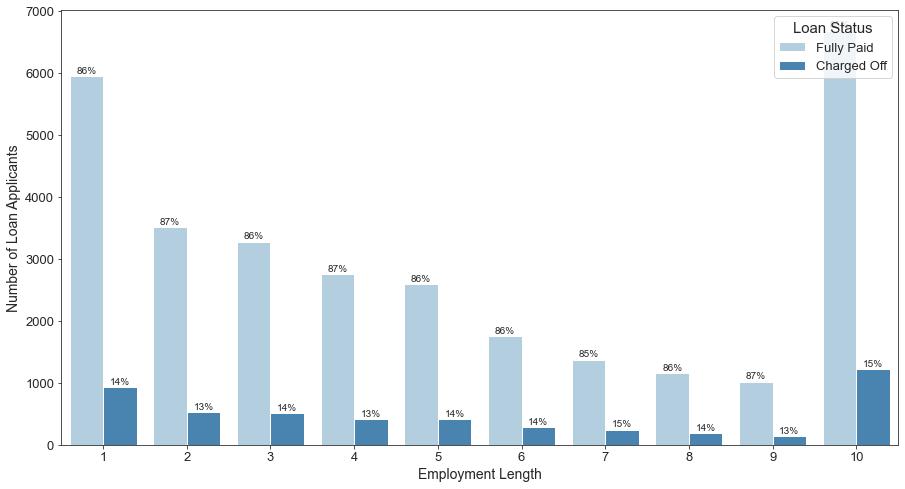

In [91]:
# plotting countplot using custom function create_countplot()
create_countplot("emp_length", "Employment Length", "Blues", 0)

### As seen from the abov plot, we can deduce that the applicants with experience of 7 years and 10 or more have the highest percentage of loan default cases.

### 10) Performing the analysis on the derived 'issue_month' column

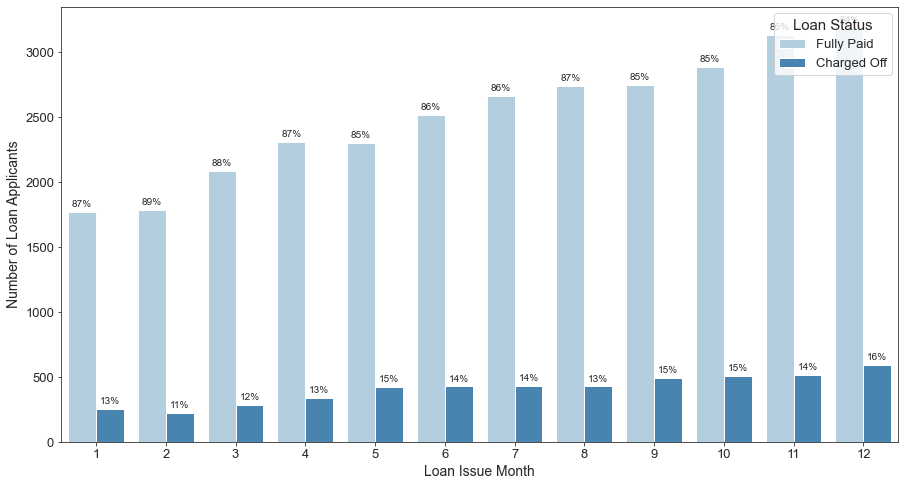

In [92]:
# plotting countplot using custom function create_countplot()
create_countplot("issue_month", "Loan Issue Month", "Blues", 0)

### As per the above graph it is quite visible that december has the highest number of loan approvals in a particular year. This may be becasue the organisation has to achieve targets in december due to year end.<br><br>Also, we see here that december also has the highest percentage of loan default cases than any other month. This may be because that these loan applications are just verified without income source verification. ( as we saw in our analysis of the verification_status column, that the highest percentage of loan default cases occur when the loan is verified but without income source verification).

## <font color =blue> Bivariate Analysis

## 1) Analysing the trend of loan status with categorical variables

In [93]:
# Creating a derived column, 'loan_status_mapping' to convert the categories under 'loan status' into 0 or 1
# Fully paid loans are mapped as 0 while default loans are mapped as 1
df['loan_status_mapping'] = df.loan_status.map({'Fully Paid': 0, "Charged Off": 1})

In [94]:
# Creating a function 'create_bar' since we will keep needing to create plots under bivariate analysis.
# So in order to avoid repetitive code writing, we will create this function here.\

def create_func(a, a_label, xlabel_rot):
    
    # this function takes in 02 variables:
    # a = the variable to be analysed (string)
    # a_label = label description (string)
    # xlabel_rot = rotation of the x-axis label ticks (integer - either 0 or 90)
    
    plt.figure(figsize=[8,5])
    sns.barplot(data=df, x=a, y='loan_status_mapping')
    plt.xlabel(a_label,fontsize=14)
    plt.ylabel("Loan Default Rate",fontsize=14)
    plt.xticks(rotation=xlabel_rot)
    plt.show()

### Looking at the trend between the loan status and the grades

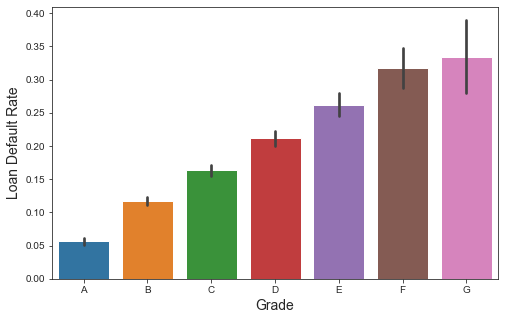

In [95]:
# Creating a bar plot between the loan_status_mapping and grade
create_func(df.grade.sort_values(), "Grade",0)

### Looking at the trend above, it is very clear that the loan default rate is higher when the grades are higher. This is a strong indicator that the loan applications with higher grades are subject to loan default.

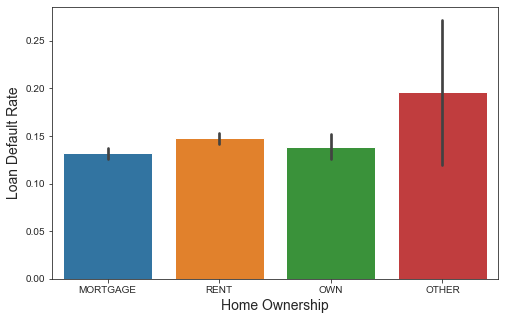

In [96]:
# Creating a bar plot between the loan_status_mapping and home ownership
create_func("home_ownership", "Home Ownership",0)

### From the above plot, we can make out that when the home ownership of the applicants is 'other' or in othe words, maybe, when they do not want to specify their home ownership status, there are high chances of loan default.

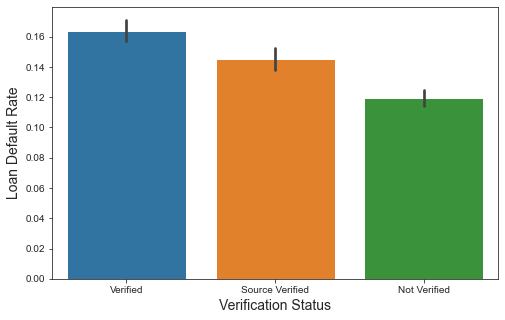

In [97]:
# Creating a bar plot between the loan_status_mapping and verification status
create_func("verification_status", "Verification Status",0)

### The loans which are verified by LC but the income source is not verified have the highest chances that it will be a default case. However, it is very surprising to note here that the loan cases which are not at all verified have the least default ratio.

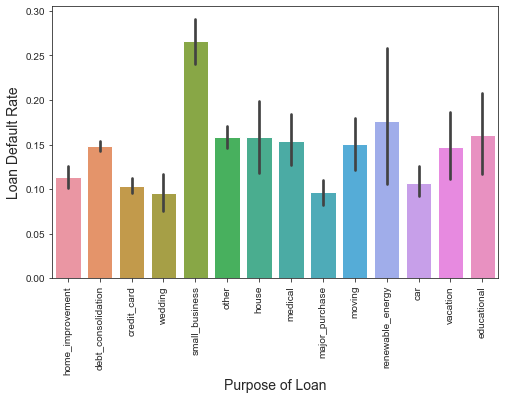

In [98]:
# Creating a bar plot between the loan_status_mapping and purpose
create_func("purpose", "Purpose of Loan",90)

### The 'purpose' column gives us a great deal of insight on whether a loan will get defaulted or not. Here as we see that the loan_applications for small business have most percentage of default cases. We may conclude here that if the purpose for loan is 'business', then it is more likely to be a default case than any other purpose. One more purpose worth noting here is 'renewable_energy' which has the second highest default cases.

## 2) Analysing the trend of loan status with numerical variables

### Looking at the trend between the loan status and loan amount

In [99]:
# Firstly we will perform binning of the loan amount.
# We will create 8 bins with an interval of 5000.
# For this, we will create a new column, 'loan_amnt_cat'
df['loan_amnt_cat'] = pd.cut(df.loan_amnt, bins = 8, precision =0, labels=['0-5000',
                                                                           '5000-10000',
                                                                           '10000-15000',
                                                                           '15000-20000',
                                                                           '20000-25000',
                                                                           '25000-30000',
                                                                           '30000-35000',
                                                                           '35000+'])

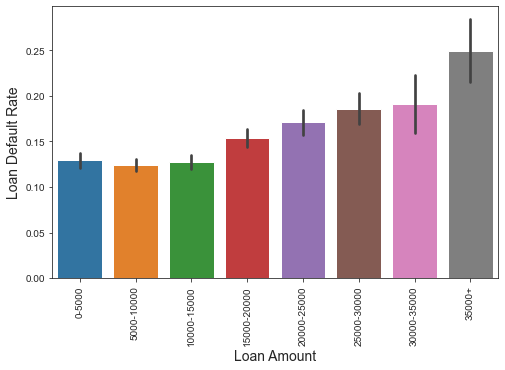

In [100]:
# Creating a bar plot between the loan_status_mapping and loan_amnt_cat
create_func("loan_amnt_cat", "Loan Amount",90)

### Looking at the trend between the loan status and loan amount, we can infer that as the loan amount is increasing, the percentage of default cases is also increasing.

In [101]:
# Firstly we will perform binning of the annual income.
# We will create 6 bins with an interval of 40000.
# For this, we will create a new column, 'loan_amnt_cat'
df['annual_inc_cat'] = pd.cut(df.annual_inc, bins = 6, precision =0, labels=['0-40000',
                                                                           '40000-80000',
                                                                           '80000-120000',
                                                                           '120000-160000',
                                                                           '160000-200000',
                                                                           '200000+'])

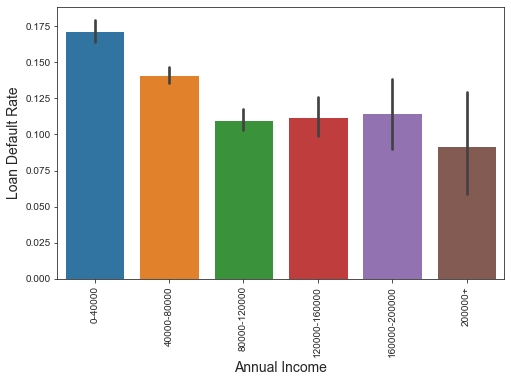

In [102]:
# Creating a bar plot between the loan_status_mapping and annual_inc_cat
create_func("annual_inc_cat", "Annual Income",90)

### So in the above plot, we see that the loans where the applicant's annual income is lower, have the highest chances of loan defaults.

## 3) Analysing the trend for other variables

### Analysing the trend between Grade and the Loan amount

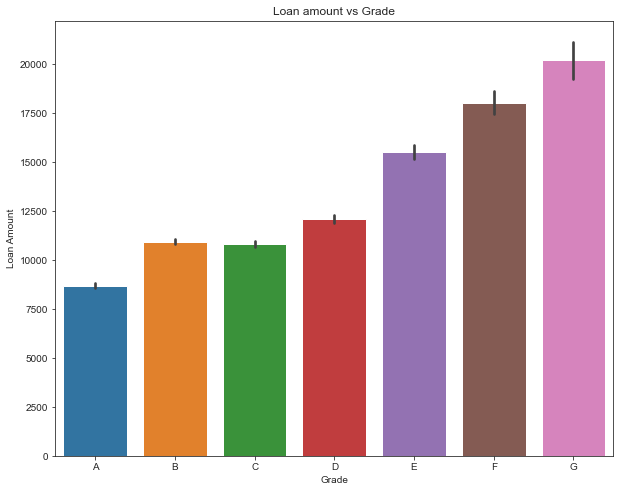

In [103]:
# Creating a bar plot between the grade and loan amount
plt.figure(figsize=[10,8])
sns.barplot(data=df, x=df.grade.sort_values(), y='loan_amnt')
plt.ylabel('Loan Amount')
plt.xlabel('Grade')
plt.title('Loan amount vs Grade')
plt.show()

### We can see from the above barplot that as the loan amount increases, the grade also increases. This means that as the loan amount increases, the loans are graded a higher number.

### Analysing the trend between loan amount and loan purpose

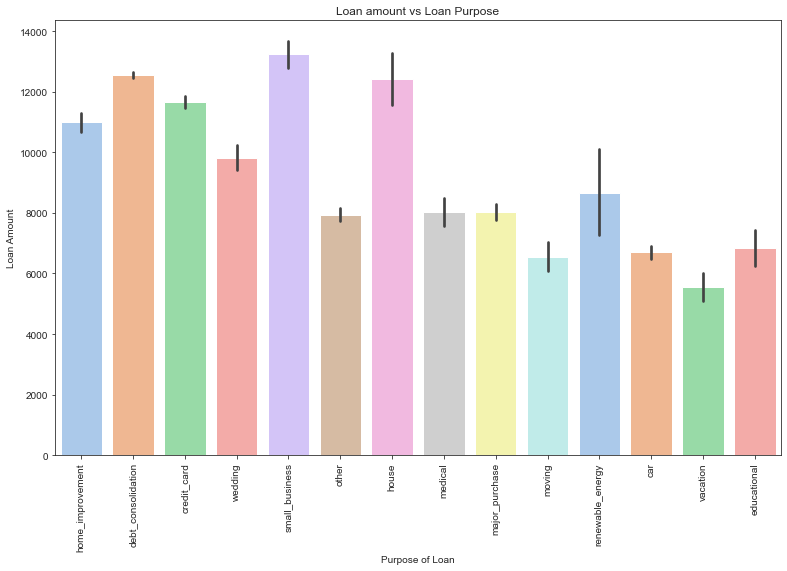

In [104]:
#plotting a bar plot between purpose and loan amount
plt.figure(figsize=(13,8))
sns.barplot(data =df,x='purpose', y='loan_amnt',palette="pastel")
plt.xticks(rotation=90)
plt.ylabel('Loan Amount')
plt.xlabel('Purpose of Loan')
plt.title('Loan amount vs Loan Purpose')
plt.show()

### The above plot clearly shows that highest average of loan amount is for 'small_business', then it is for 'house.

## 4) Checking for Correlation between all the numerical variables using Heat map

In [105]:
# Creating dervied column for 'grade'
df['grade_mapping'] = df.grade.map({'A': 1, "B": 2,'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7 })

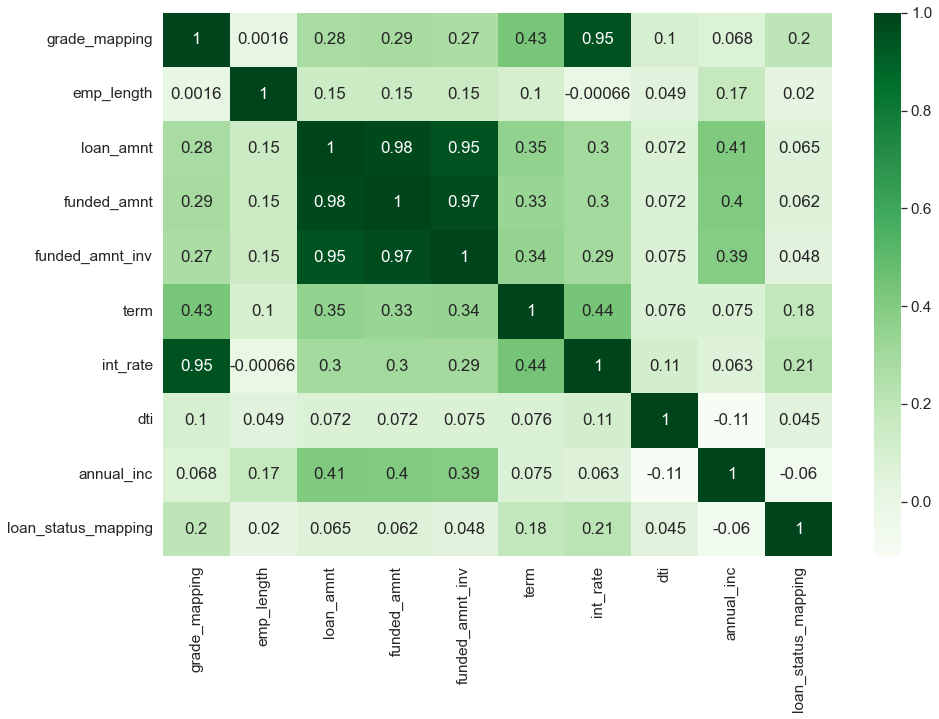

In [106]:
# Creating heatmap using seaborn
sns.set(font_scale=1.4)
plt.figure(figsize=[15,10])
sns.heatmap(df[['grade_mapping','emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate','dti','annual_inc', 'loan_status_mapping']].corr(), cmap='Greens', annot=True)
plt.show()

### So there's a lot going on here. Lot of variables here, as we see, have a positive correlation with each other. Two variables which have a negative correlation with each other are - 'dti' and 'annual_inc', which is understood as higher the income, lower is the debt to income ratio.<br>One more negative correlation is seen between 'int_rate' and 'emp_length'. So that means, as the employment length is increasing, the interest rate is reducing.<br><br>The strongest positive relation is seen between 'loan_amnt', 'funded_amnt' and 'funded_amnt_inv'.<br>We also see that 'int_rate' and 'grade' are strongly correlated as well. So higher graded loans have higher interest rates or vice versa.<br>'Grade' also has average correlation with 'term'. The loans with term '60 months' have high grades. Also, the loans with high 'loan_amnt' or high 'funded_amnt' or high 'funded_amnt_inv' are assigned high grades.